In [1]:
#Files

 #   train.csv - historical data including Sales
  #  test.csv - historical data excluding Sales
   # sample_submission.csv - a sample submission file in the correct format
   # store.csv - supplemental information about the stores


In [2]:
#importing the libraries

import pandas as pd
import numpy as np
from scipy import stats
import datetime 
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')



In [5]:
store_data = pd.read_csv('/content/store.csv')
#train_data = pd.read_csv('/content/train.csv')
infile = "/content/train.csv"
train_data = pd.read_csv(infile,error_bad_lines=False, engine="python")
test_data = pd.read_csv('/content/test.csv')

Skipping line 27843: unexpected end of data


In [6]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,27841.000000,27841.000000,27841.000000,27841.000000,27841.000000,27841.000000,27841.0,27841.000000
mean,557.339930,3.922345,6188.506447,647.695629,0.881793,0.400488,0.0,0.417586
std,321.519693,1.895682,3579.436538,426.411635,0.322859,0.490006,0.0,0.493170
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,279.000000,2.000000,4357.000000,451.000000,1.000000,0.000000,0.0,0.000000
50%,557.000000,4.000000,6083.000000,612.000000,1.000000,0.000000,0.0,0.000000
75%,836.000000,5.000000,8076.000000,813.000000,1.000000,1.000000,0.0,1.000000
max,1115.000000,7.000000,32547.000000,4783.000000,1.000000,1.000000,0.0,1.000000


In [10]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [11]:
store_data.isna().sum() #Checking null values

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)
store_data.Promo2SinceWeek.fillna(0,inplace=True)
store_data.Promo2SinceYear.fillna(0,inplace=True)
store_data.PromoInterval.fillna(0,inplace=True)
store_data.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store_data.CompetitionOpenSinceYear.fillna(0,inplace=True)


In [13]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [14]:
test_data.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [15]:
test_data['Open'].fillna(test_data['Open'].median(), inplace = True)

In [16]:
test_data.isna().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [18]:
train_data.Customers.fillna(0,inplace=True)
train_data.Open.fillna(0,inplace=True)
train_data.Promo.fillna(0,inplace=True)
train_data.StateHoliday.fillna(0,inplace=True)
train_data.SchoolHoliday.fillna(0,inplace=True)
train_data.DayOfWeek.fillna(0,inplace=True)
train_data.Date.fillna(0,inplace=True)
train_data.Sales.fillna(0,inplace=True)



In [19]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [20]:
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [21]:
test_data.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [22]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

In [23]:
###use the date column and create year nd month separately as a column
train_data.Date = pd.to_datetime(train_data["Date"])
test_data.Date = pd.to_datetime(test_data["Date"])



In [24]:
# Create Year and Month columns
train_data['Year']  = train_data['Date'].apply(lambda x: int(str(x)[:4])) #4 here is first four digits in 'date' column represents the year
train_data['Month'] = train_data['Date'].apply(lambda x: int(str(x)[5:7]))

test_data['Year']  = test_data['Date'].apply(lambda x: int(str(x)[:4]))
test_data['Month'] = test_data['Date'].apply(lambda x: int(str(x)[5:7]))

train_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


In [25]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
train_data['Date'] = train_data['Date'].apply(lambda x: (str(x)[:7]))  # 7 here represents the lenght =7 including space
test_data['Date']     = test_data['Date'].apply(lambda x: (str(x)[:7]))


In [26]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,2015,7
2,3,5,2015-07,8314,821,1,1,0,1,2015,7
3,4,5,2015-07,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07,4822,559,1,1,0,1,2015,7


In [27]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{train_data.shape}')
print(f'Testing dataset:{test_data.shape}')
print(f'Store dataset:{store_data.shape}')

Shapes of our datasets
-----------------------
Training dataset:(27841, 11)
Testing dataset:(41088, 10)
Store dataset:(1115, 10)


In [28]:
# Merging the training dataset with the store dataset 
train_store_data=pd.merge(train_data, store_data, on='Store', how='inner')

In [29]:
train_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07,5263,555,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07,5020,546,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07,4782,523,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07,5011,560,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07,6102,612,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [30]:
# Merging the test dataset with the store dataset
test_store_data=pd.merge(test_data, store_data, on='Store', how='inner')

In [ ]:
test_store_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09,1.0,1,0,0,2015,9,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09,1.0,1,0,0,2015,9,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09,1.0,1,0,0,2015,9,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09,1.0,1,0,0,2015,9,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09,0.0,0,0,0,2015,9,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
# promo and sales ....based on promo what were the sales??
sales_promo = train_data.groupby('Promo')["Sales"].sum()

promo_sale= pd.DataFrame({'Promo':sales_promo.index, 'sales_sum':sales_promo.values})
promo_sale.head()



,Promo,sales_sum
0,0,79802266
1,1,92491942


In [ ]:
#customers promo
customers_promo = train_data.groupby('Promo')["Customers"].sum()

promo_customers= pd.DataFrame({'Promo':customers_promo.index, 'Customers':customers_promo.values})
promo_customers.head()



,Promo,Customers
0,0,9031123
1,1,9001371


In [ ]:
###Check & compare sales behavior before, during and after holidays

In [ ]:
# 1)see the below shell too to understand it better
def affect_list(change_list, interval, duration, index):
    start_pt = int(index-duration/2) - interval
    try:
        for index in range(start_pt, start_pt + interval):
            change_list[index] = 'before'
        for index in range(start_pt + interval, start_pt + interval + duration):
            change_list[index] = 'during'
        for index in range(start_pt + interval + duration, start_pt + interval + duration + interval):
            change_list[index] = 'after'
    except:
        pass

    return change_list

In [ ]:

#2)
# get state holiday list
# 10 days for Easter
# 3 days for public holiday
# Considering christmas lasts for 12 days, Easter for 50 days and public holidays for 1 day.
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#here affect_list is a fn above written

state_holiday_list = train_data['StateHoliday'].values.tolist()
def modify_holiday_list(holiday_list:list) -> list:
    new_index = ["neither"] * len(holiday_list)
    for index , value in enumerate(holiday_list):
        if value == 'a': #public holiday
            affect_list(new_index, 3, 1, index)
        elif value == 'b': #Easter
            affect_list(new_index, 10, 50, index)
        elif value == 'c': # christmas
            affect_list(new_index, 5, 12, index)
        else:
            pass

    return new_index



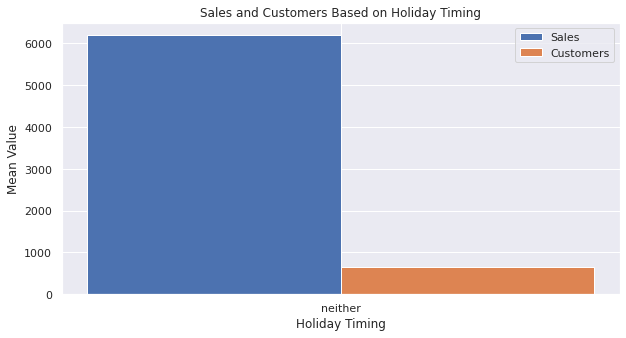

In [ ]:
#3)
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_data.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

#visualization
plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()

In [ ]:
###Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [ ]:
average_sales = train_data.groupby('StateHoliday')["Sales"].mean()
#average_sales = average_sales.iloc[2:,:]

ax1 = average_sales.plot(legend=True,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())



In [ ]:
# aggregated df from sales mean and custmers mean
seasonal = train_data.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[1:,:] #this location determines below graph input
seasonal.head()

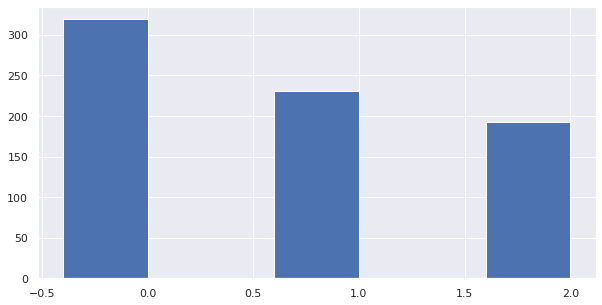

In [ ]:
# 
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')

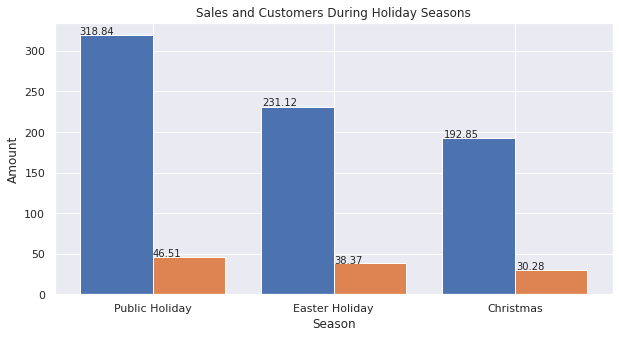

In [ ]:
# seasonal index
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))     
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.show()

In [ ]:
###What can you say about the correlation between sales and number of customers?

In [ ]:
sales_customer_rln = train_data.loc[:,['Sales','Customers']]
sales_cutomer_corr = sales_customer_rln.corr()
sales_cutomer_corr.head()

,Sales,Customers
Sales,1.000000,0.890706
Customers,0.890706,1.000000


In [ ]:
###How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


In [ ]:
sales_promo_rln = train_store_data.loc[:,['Sales','Promo']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr.head()

,Sales,Promo
Sales,1.00000,0.44739
Promo,0.44739,1.00000


In [ ]:
###Trends of customer behavior during store open and closing times

customer_behaviour = train_data.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour.head()



,Customers,Sales
Open,,
0.0,0.000000,0.000000
1.0,762.495299,7205.740849


In [ ]:
###Which stores are opened on all weekdays? How does that affect their sales on weekends?

weekly_data = train_store_data.groupby(['DayOfWeek']).agg({'Sales': ['sum'], 'Open': ['sum']})
weekly_data.columns = ['sales', 'Open']
weekly_data = weekly_data.reset_index()

weekly_data.head()

,DayOfWeek,sales,Open
0,1,289927855,34035.0
1,2,269706294,35920.0
2,3,249597153,36222.0
3,4,228794160,32623.0
4,5,239757993,33302.0


In [ ]:
weekly_data = train_store_data.groupby(['StoreType']).agg({'Open': ['sum'], 'DayOfWeek': ['count']})
weekly_data.columns = ['Open', 'DayOfWeek']
weekly_data = weekly_data.reset_index()

weekly_data



,StoreType,Open,DayOfWeek
0,a,112353.0,136457
1,b,3876.0,3876
2,c,27641.0,33660
3,d,64402.0,78329


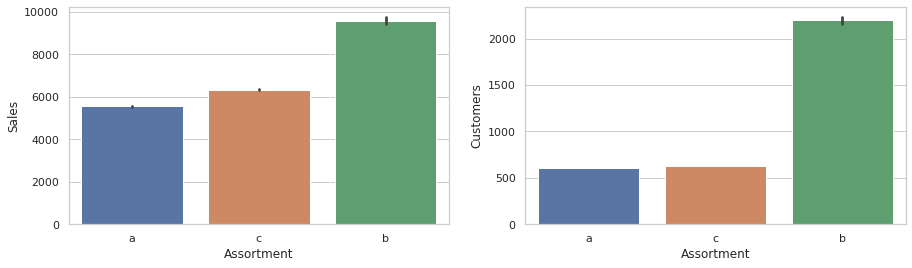

In [ ]:
#Check how the assortment type affects sales

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=train_store_data, ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=train_store_data,  ax=axis2)



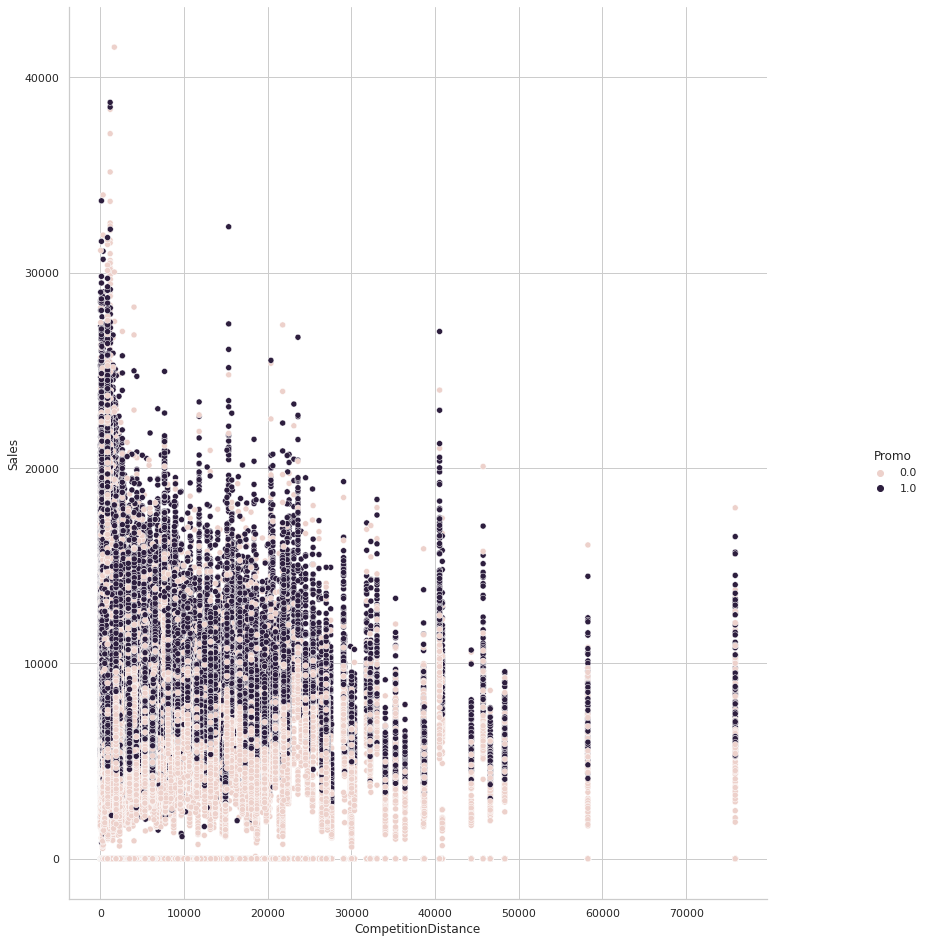

In [ ]:
#How does the distance to the next competitor affect sales?
# What if the store and its competitors all happen to be in city centres,
# does the distance matter in that case?

sns.set(style="whitegrid")
g=sns.relplot(x="CompetitionDistance", y="Sales", hue="Promo", data=train_store_data)
g.fig.set_size_inches(15,15)



In [ ]:
###Correlation Analysis

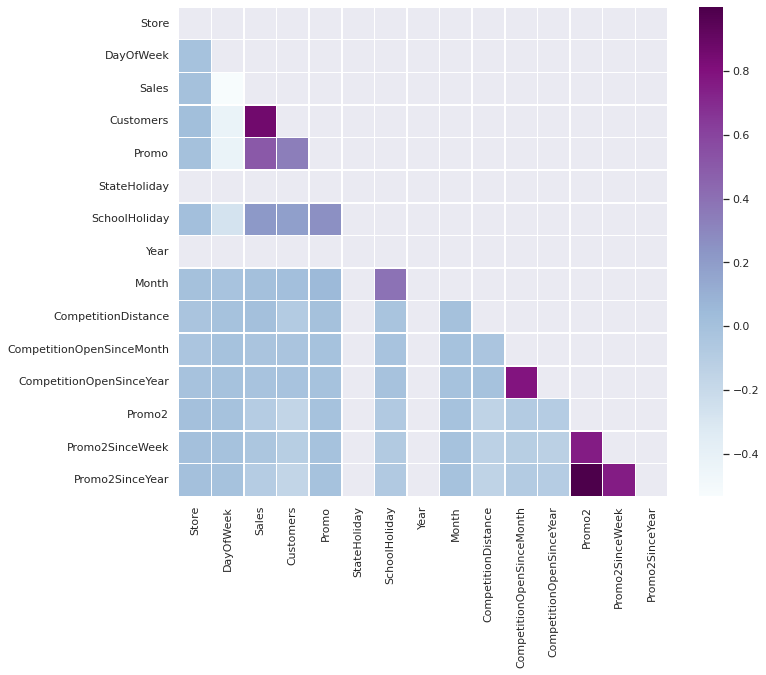

In [ ]:
# Compute the correlation matrix 
corr_all = train_store_data.drop('Open', axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [ ]:
##More Features

In [ ]:
# Adding salespercustomer column
train_store_data['SalesPerCustomer']=train_store_data['Sales']/train_store_data['Customers']

In [ ]:
train_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer
0,1,5,2015-07,5263,555,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,2015-07,5020,546,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,2015-07,4782,523,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,2015-07,5011,560,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,2015-07,6102,612,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [ ]:
# Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same 
# underlying meaning, merging them into one variable
train_store_data['CompetitionOpenSince'] = np.where((train_store_data['CompetitionOpenSinceMonth']==0) & 
                                                  (train_store_data['CompetitionOpenSinceYear']==0) , 0,
                                                  (train_store_data.Month - train_store_data.CompetitionOpenSinceMonth) + (12 * (train_store_data.Year - train_store_data.CompetitionOpenSinceYear)))



In [ ]:

#Checking for duplicate values

train_store_data.duplicated().sum() 


2153

In [ ]:
#incase dupicate found use below line to drop it 
train_store_data.drop_duplicates(inplace=True)
train_store_data.duplicated().sum() 

0

In [ ]:
#Remove the NaN values from the dataset
train_store_data.dropna(how='any',inplace=True)
train_store_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
SalesPerCustomer             0
CompetitionOpenSince         0
dtype: int64

In [ ]:
###Conversion of types

train_store_data['CompetitionOpenSinceMonth'] = train_store_data['CompetitionOpenSinceMonth'].astype(int)

train_store_data['CompetitionOpenSinceYear'] = train_store_data['CompetitionOpenSinceYear'].astype(int)

train_store_data['Promo2SinceWeek'] = train_store_data['Promo2SinceWeek'].astype(int)

train_store_data['Promo2SinceYear'] = train_store_data['Promo2SinceYear'].astype(int)

train_store_data['CompetitionOpenSince'] = train_store_data['CompetitionOpenSince'].astype(int)
train_store_data['SchoolHoliday'] = train_store_data['SchoolHoliday'].astype(int)
train_store_data['CompetitionDistance'] = train_store_data['CompetitionDistance'].astype(int)

train_store_data['SalesPerCustomer'] = train_store_data['SalesPerCustomer'].astype(int)



In [ ]:
####Labeling Object Columns

train_store_data['StateHoliday'] = train_store_data['StateHoliday'].apply(lambda x: 'o' if x == '0' else x)
train_store_data['StateHoliday'] = train_store_data['StateHoliday'].apply(lambda x: 'o' if x == 0 else x)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_store_data.CompetitionOpenSinceMonth = le.fit_transform(train_store_data.CompetitionOpenSinceMonth)
train_store_data.CompetitionOpenSinceYear = le.fit_transform(train_store_data.CompetitionOpenSinceYear)
train_store_data.Promo2SinceWeek = le.fit_transform(train_store_data.Promo2SinceWeek)
train_store_data.Promo2SinceYear = le.fit_transform(train_store_data.Promo2SinceYear)
train_store_data.CompetitionOpenSince = le.fit_transform(train_store_data.CompetitionOpenSince)


train_store_data.StoreType = le.fit_transform(train_store_data.StoreType)
train_store_data.Assortment = le.fit_transform(train_store_data.Assortment)
train_store_data.StateHoliday = le.fit_transform(train_store_data.StateHoliday)


In [ ]:
###Scaling Data

In [ ]:
# Store Date Customers
train_store_data.drop(['Store','Date','PromoInterval'],axis=1,inplace=True)
train_store_data.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,SalesPerCustomer,CompetitionOpenSince
0,5,5263,555,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,9,77
1,4,5020,546,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,9,77
2,3,4782,523,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,9,77
3,2,5011,560,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,8,77
4,1,6102,612,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,9,77


In [ ]:
train_store_data.dtypes

DayOfWeek                    int64
Sales                        int64
Customers                    int64
Open                         int64
Promo                        int64
StateHoliday                 int64
SchoolHoliday                int64
Year                         int64
Month                        int64
StoreType                    int64
Assortment                   int64
CompetitionDistance          int64
CompetitionOpenSinceMonth    int64
CompetitionOpenSinceYear     int64
Promo2                       int64
Promo2SinceWeek              int64
Promo2SinceYear              int64
SalesPerCustomer             int64
CompetitionOpenSince         int64
dtype: object

In [ ]:
# Using StandardScaler to standardize the all columns
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler(with_mean = False)
train_store_data = sc.fit_transform(train_store_data)

In [ ]:
###saving storetrain data-in google colab saving not passible
#train_store_data.to_csv('../train_store.csv', index=False)

In [ ]:
#####Machine Learning

In [ ]:
## separate the independent and target variable 


X = train_store_data.drop(['Customers', 'Sales', 'SalesPerCustomer'], axis = 1)

X.head()


,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpenSince
0,5,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,77
1,4,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,77
2,3,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,77
3,2,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,77
4,1,1,1,0,1,2015,7,2,0,1270,9,16,0,0,0,77


In [ ]:
y = train_store_data['Sales']
y.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
import pickle
from datetime import datetime
from pickle import dump

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
np.random.seed(40)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse

In [ ]:
# Splitting our dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [ ]:
# Define the Pipeline
model_pipeline = Pipeline(steps=[('random_forest', RandomForestRegressor(max_depth=10,random_state=2))])

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    print("RMSE Score is: {:.5%}".format(rmse))
    print("R2 Square Score is: {:.5%}".format(r2))
    print("MAE Score is: {:.5%}".format(mae))
    return {f'RMSE Score': rmse, f'R2_Squared': r2, f'MAE Score': mae}



In [ ]:
# Fit the pipeline with the data
best_model = model_pipeline.fit(X_train, y_train)
train_score = best_model.score(X_train, y_train)
valid_score = best_model.score(X_valid, y_valid)
valid_metrics = eval_metrics(y_valid, best_model.predict(X_valid))
test_score = best_model.score(X_test, y_test)
test_metrics = eval_metrics(y_test, best_model.predict(X_test))
 

RMSE Score is: 182163.31943%
R2 Square Score is: 62.28654%
MAE Score is: 134295.76013%
RMSE Score is: 187008.47706%
R2 Square Score is: 59.29410%
MAE Score is: 135446.68283%


In [ ]:
def generate_model_name(mse_score: float) -> str:
    now = datetime.now()
    dt_string = now.strftime("%d-%m-%Y-%H-%M-%S-")
    dt_string = dt_string + "{:.2%}".format(mse_score)
    return dt_string

In [ ]:
valid_metrics

{'RMSE Score': 1821.633194268746,
 'R2_Squared': 0.6228653787785658,
 'MAE Score': 1342.957601301534}

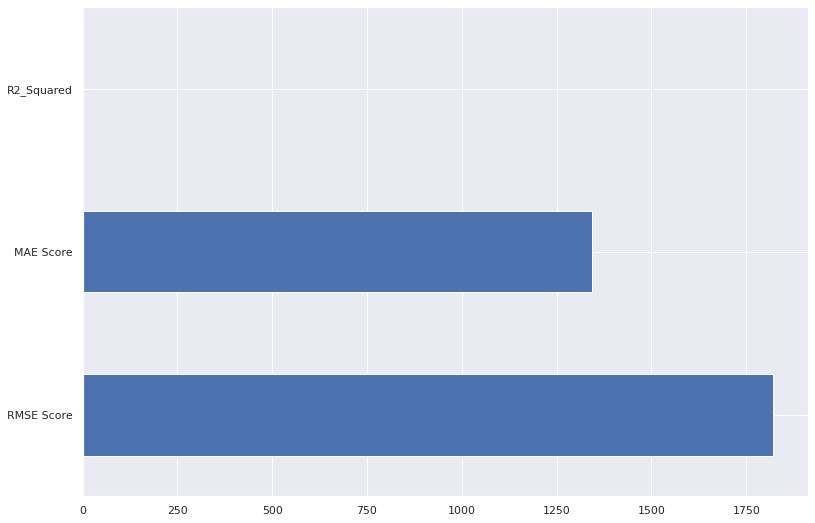

In [ ]:
plt.figure(figsize=(13,9))
feat_importances = pd.Series(valid_metrics, index = valid_metrics.keys())
feat_importances.nlargest(10).plot(kind='barh');

In [ ]:
test_metrics

{'RMSE Score': 1870.0847706245136,
 'R2_Squared': 0.592940969887197,
 'MAE Score': 1354.4668283214633}

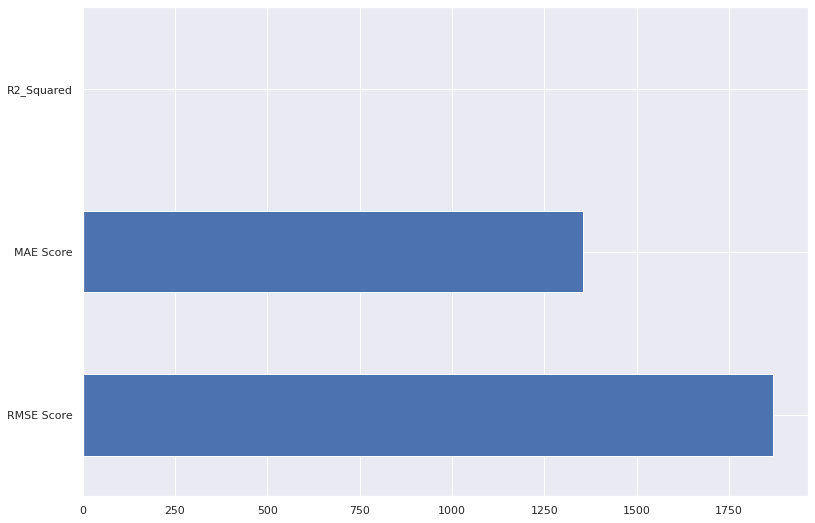

In [ ]:
plt.figure(figsize=(13,9))
feat_importances = pd.Series(test_metrics, index = test_metrics.keys())
feat_importances.nlargest(10).plot(kind='barh');



In [ ]:
####Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.55 shows that the model can relatively predict the data accurately. In addition, 
#Adjusted R-squared more than 0.70 is a very good value for showing the accuracy

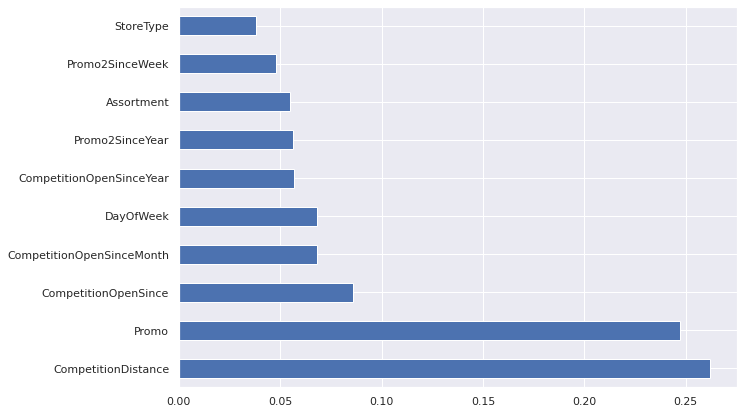

In [ ]:

####Feature Importance

plt.figure(figsize=(10,7))
feat_importances = pd.Series(best_model.steps[0][1].feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh');



In [ ]:
def save_model(model, mse_score) -> None:
    try:
        file_name = '../models/' + generate_model_name(mse_score=mse_score) +'.pkl'
        with open(file_name, 'wb') as handle:
            dump(model, handle)
    except Exception as e:
        print('Error while producing model')

In [ ]:
save_model(best_model, test_metrics['RMSE Score'])

In [ ]:
best_model.get_params()